# Predicting Credit Card Approval

Problem Statment - A company needs to robotize the credit card eligibility measure dependent on client detail gave while filling on the web application structure and credit card history of costumer.

                                   Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques.

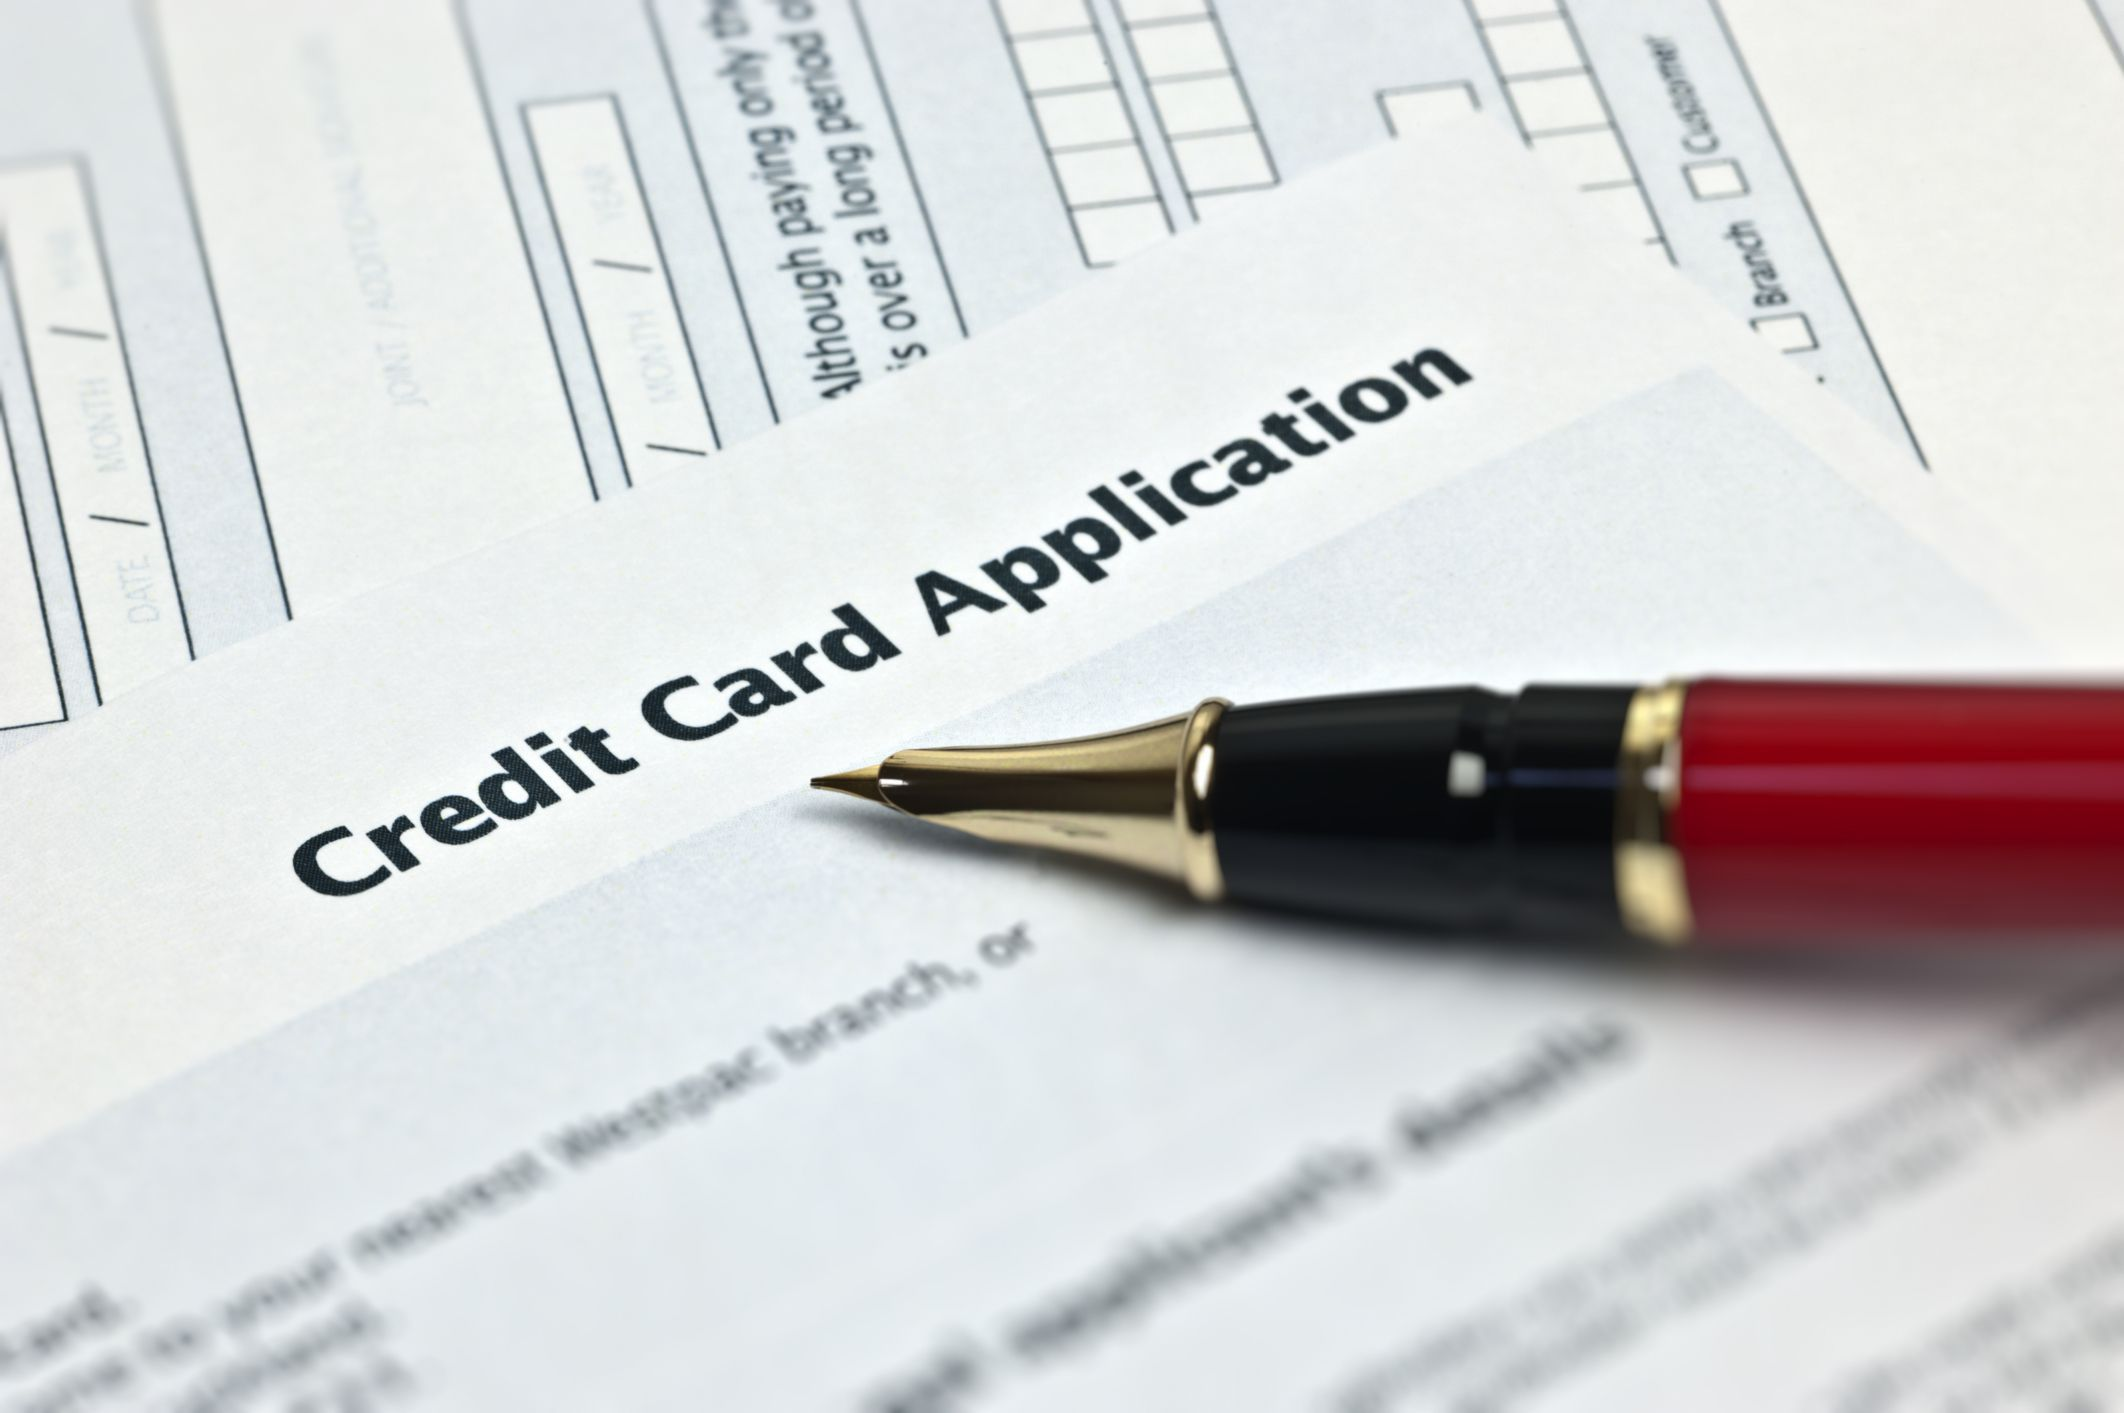

Dataset downloaded from Kaggle - https://www.kaggle.com/rikdifos/credit-card-approval-prediction. The structure of the Notebook can be discribed by 
a)Exploratory Data Analysis (EDA)
b) visviualization
c)Merging Dataframe
d)Feature selection and Building machine learning model

# Loading and Viewing data 

In [4]:
# Import pandas
import pandas as pd

# Load dataset
cc_app = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\application_record.csv")
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


<h1>Explanation</h1>

    



|Feature name|          |Explanation|
|------------|          |-----------|
|ID|	                |Client number|
|CODE_GENDER|           |Gender|
|FLAG_OWN_CAR|          |Is there a car|
|FLAG_OWN_REALTY|       |Is there a property|
|CNT_CHILDREN|	        |Number of children|
|AMT_INCOME_TOTAL|      |Annual income|
|NAME_INCOME_TYPE|      |Income category|
|NAME_EDUCATION_TYPE|	|Education level|
|NAME_FAMILY_STATUS|	|Marital status|
|NAME_HOUSING_TYPE|	    |Way of living|
|DAYS_BIRTH|	        |Birthday|
|DAYS_EMPLOYED|	        |Start date of employment|
|FLAG_MOBIL|	        |Is there a mobile phone|
|FLAG_WORK_PHONE|	    |Is there a work phone|
|FLAG_PHONE|	        |Is there a phone|
|FLAG_EMAIL|	        |Is there an email|
|OCCUPATION_TYPE|	    |Occupation|
|CNT_FAM_MEMBERS|	    |Family size|

Note -

DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday.

DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

In [8]:
cc_app1 = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\credit_record.csv")
cc_app1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Exlanation

|Feature name|  |Explanation|
|------------|  |-----------|
|ID|            |Client number|
|MONTHS_BALANCE||Record month|
|STATUS|        |Status|


MONTHS_BALANCE :The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.

STATUS: 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
cc_app.shape

(438557, 18)

Hence we have 438557 Rows and 18 Columns

In [11]:
cc_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Similarly for sencond file lest see what we got

In [12]:
cc_app1.shape

(1048575, 3)

In [13]:
cc_app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# Exploratory Data Analysis (EDA)

EDA on application_record csv file.
Lets see the Statistics

In [14]:
cc_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


Is their any null values?

In [16]:
cc_app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Dropping occupation_ which has many null values


In [17]:
cc_app.drop('OCCUPATION_TYPE', axis=1, inplace=True)

Checking duplicates in 'ID' column


In [20]:
len(cc_app['ID']) - len(cc_app['ID'].unique())

47

Dropping duplicate entries from ID column


In [21]:
cc_app = cc_app.drop_duplicates('ID', keep='last') 

Which are Numerical and categorical Columns ?


In [51]:
 # Numerical
num_columns = cc_app.columns[(cc_app.dtypes !='object').values].tolist()
num_columns

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS']

In [26]:
# categorical
cat_columns = cc_app.columns[(cc_app.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

Now lets see what are their unique values for cat column

In [28]:
for i in cc_app.columns[(cc_app.dtypes =='object').values].tolist():
    print(i,'\n')
    print(cc_app[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

similarly check unique values of numerics

In [29]:
cc_app['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
6          4
12         4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

# What can we do for DAYS_BIRTH ans DAYS_EMPLOYES column?

Check max and mini values and convert days into years for birth column, but in case of employe column their is no max or min because +ve means unemployed and -ve means employed.

In [30]:
print('Min DAYS_BIRTH :', cc_app['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', cc_app['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [32]:
cc_app['DAYS_BIRTH'] = round(cc_app['DAYS_BIRTH']/-365,0)
cc_app.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [33]:
cc_app[cc_app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [35]:
# If 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0 
cc_app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [37]:
cc_app['DAYS_EMPLOYED'] = abs(round(cc_app['DAYS_EMPLOYED']/-365,0))
cc_app.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 

In [38]:
cc_app['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [39]:
# All the values in column are 1, hence drop
cc_app.drop('FLAG_MOBIL', axis=1, inplace=True)

In [40]:
cc_app['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [41]:
cc_app.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [42]:
cc_app['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [92]:
cc_app.drop('FLAG_PHONE', axis=1, inplace=True)

In [43]:
cc_app.drop('FLAG_EMAIL', axis=1, inplace=True)

In [44]:
cc_app['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [94]:
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


# visualization

Let us understand our data more precisly by  creating boxplot to detect outliers.

Outliers are extreme values that fall a long way outside of the other observations.

<AxesSubplot:xlabel='CNT_CHILDREN'>

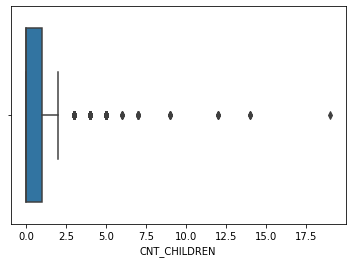

In [63]:
sns.boxplot(cc_app['CNT_CHILDREN'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

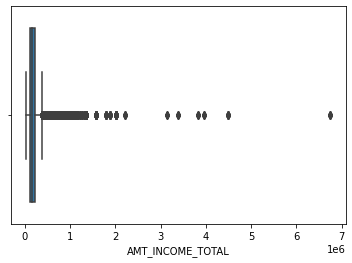

In [64]:
sns.boxplot(cc_app['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AGE_YEARS'>

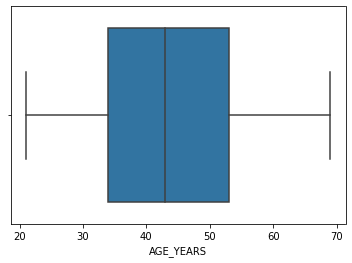

In [65]:
sns.boxplot(cc_app['AGE_YEARS'])

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

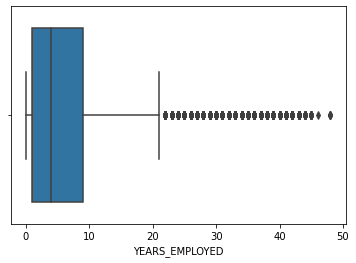

In [66]:
sns.boxplot(cc_app['YEARS_EMPLOYED'])

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

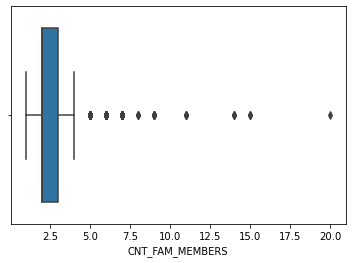

In [67]:
sns.boxplot(cc_app['CNT_FAM_MEMBERS'])


Remove outliers

In [68]:
high_bound = cc_app['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_app['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [70]:
cc_app = cc_app[(cc_app['CNT_CHILDREN']>=low_bound) & (cc_app['CNT_CHILDREN']<=high_bound)]

In [71]:
high_bound = cc_app['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_app['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


<AxesSubplot:xlabel='CNT_CHILDREN'>

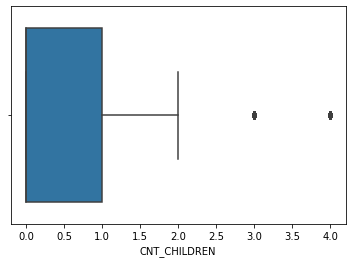

In [72]:
sns.boxplot(cc_app['CNT_CHILDREN'])

In [73]:
cc_app = cc_app[(cc_app['AMT_INCOME_TOTAL']>=low_bound) & (cc_app['AMT_INCOME_TOTAL']<=high_bound)]

In [74]:
high_bound = cc_app['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_app['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 40.0
low_bound : 0.0


In [75]:
cc_app = cc_app[(cc_app['YEARS_EMPLOYED']>=low_bound) & (cc_app['YEARS_EMPLOYED']<=high_bound)]

In [76]:
high_bound = cc_app['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_app['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [77]:
cc_app = cc_app[(cc_app['CNT_FAM_MEMBERS']>=low_bound) & (cc_app['CNT_FAM_MEMBERS']<=high_bound)]

In [95]:
cc_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [79]:
cc_app1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [81]:
cc_app1.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [82]:
cc_app1['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

categorise status to binar classification as 0 and 1 as good and bad customer.

In [83]:
cc_app1['STATUS'].replace(['C', 'X'],0, inplace=True)

In [84]:
cc_app1['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [85]:
cc_app1['STATUS'] = cc_app1['STATUS'].astype('int')

In [86]:
cc_app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [87]:
cc_app1['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [88]:
cc_app1_trans = cc_app1.groupby('ID').agg(max).reset_index()

In [89]:
cc_app1_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
cc_app1_trans.head()


,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


# Merging Dataframes

When we concatenated our DataFrames we simply added them to each other i.e. stacked them either vertically or side by side. Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique id). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other. .so we merge our data based on 'ID'.

In [96]:
comp_df = pd.merge(cc_app, cc_app1_trans, on='ID', how='inner')
comp_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [91]:
comp_df.shape

(36326, 15)

In [97]:
comp_df.drop('ID', axis=1, inplace=True)

In [99]:
len(comp_df) - len(comp_df.drop_duplicates())

25268

In [100]:
comp_df = comp_df.drop_duplicates()
comp_df.reset_index(drop=True ,inplace=True)

In [101]:
comp_df.shape

(11058, 13)

In [102]:
comp_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [103]:
comp_df['STATUS'].value_counts(normalize=True)*100

0    78.513294
1    21.486706
Name: STATUS, dtype: float64

# visuals

In [104]:
comp_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


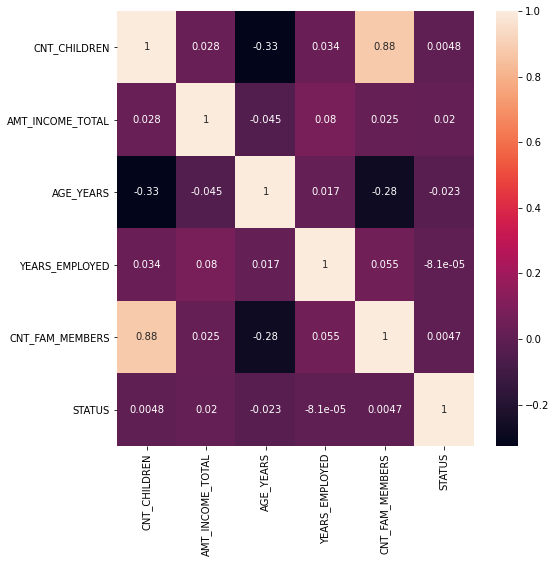

In [105]:
plt.figure(figsize = (8,8))
sns.heatmap(comp_df.corr(), annot=True)
plt.show()

 number of Male and female applications received

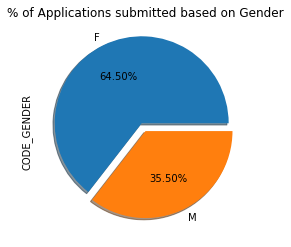

In [120]:
comp_df['CODE_GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

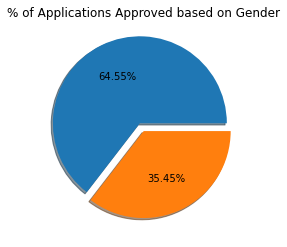

In [121]:
plt.pie(comp_df[comp_df['STATUS']==0]['CODE_GENDER'].value_counts(),explode=(0.1,0), shadow=True, autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

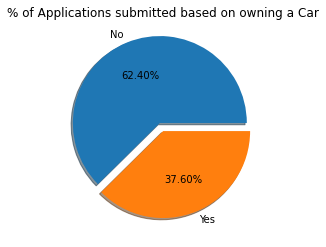

In [122]:
plt.pie(comp_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'],explode=(0.1,0), shadow=True,autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

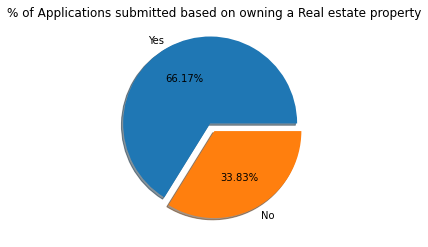

In [123]:
plt.pie(comp_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], explode=(0.1,0), shadow=True,autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

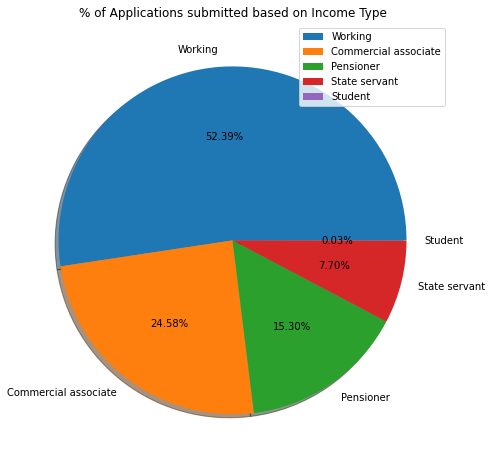

In [130]:
plt.figure(figsize = (8,8))
plt.pie(comp_df['NAME_INCOME_TYPE'].value_counts(), labels=comp_df['NAME_INCOME_TYPE'].value_counts().index, shadow=True,autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

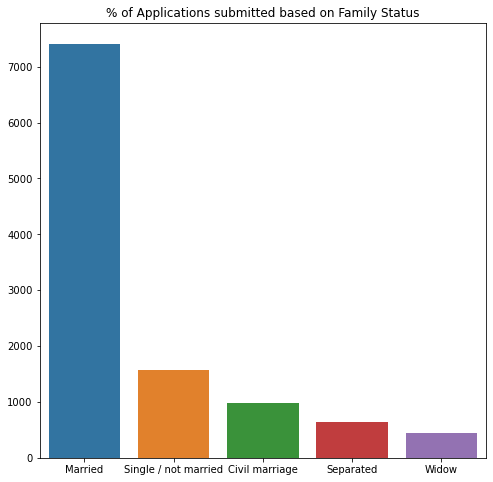

In [113]:
plt.figure(figsize=(8,8))
sns.barplot(comp_df['NAME_FAMILY_STATUS'].value_counts().index, comp_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

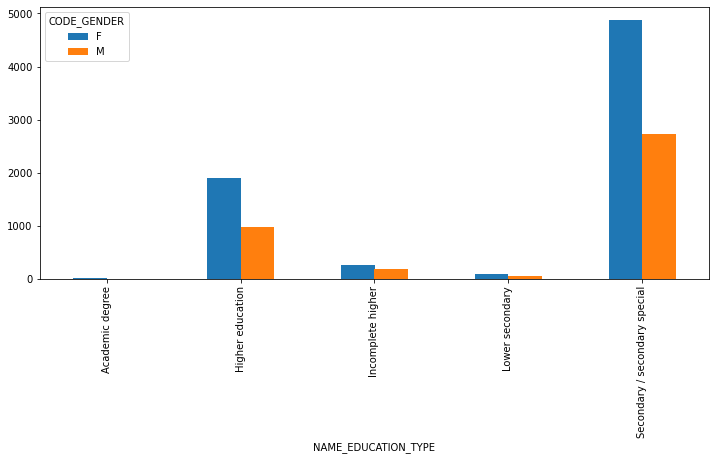

In [131]:
a = comp_df.pivot_table(index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values=['CNT_CHILDREN'], aggfunc='size')
a.plot(kind='bar', figsize=(12, 5))

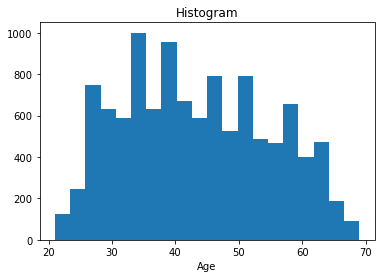

In [132]:
plt.hist(comp_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

In [ ]:
This graph shows that, majority of applicatant's are 25 to 65 years old

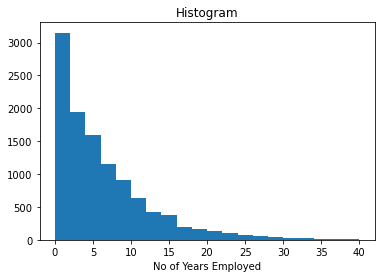

In [134]:
plt.hist(comp_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

In [ ]:
This graph shows that, majority of applicatant's are Employed for 0 to 7 years

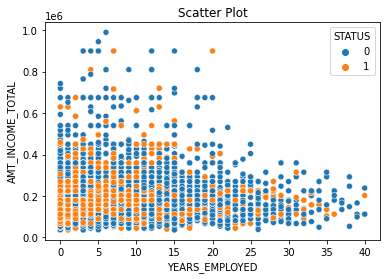

In [138]:
sns.scatterplot(comp_df['YEARS_EMPLOYED'], comp_df['AMT_INCOME_TOTAL'], hue=comp_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

# Feature Selection

In [139]:
comp_df.head ()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


we have both categorical and numerical values in our data frame .For building machine modle convert all non numerical 
values to numerial values. use (Label Encoder) for conversion.
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [140]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        comp_df[col] = globals()['LE_{}'.format(col)].fit_transform(comp_df[col])
comp_df.head()    

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0


In [141]:
features = comp_df.drop(['STATUS'], axis=1)
label = comp_df['STATUS']

In [142]:
features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0


In [143]:
label.head()

0    1
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int32

# Machine Learning Model

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data.
Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

Logistic Regression
Logistic Regression is used when the dependent variable(target) is categorical.

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  78.84267631103074 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Precision: When it predicts yes, how often is it correct?

Recall says out of total actual classes whether my model can predict all of them correctly?

Accuracy: Overall, how often is the classifier correct?

F Score: This is a weighted average of the true positive rate (recall) and precision.


Random Forest classification 

Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm
(irrespective of situation), use random forest!. Random Forest is a versatile machine learning method capable of
performing both regression and classification tasks.
It also treats missing value ,outlier values,other essential steps of data exploration, and does a fairly good job.

here, N_estimators is how many trees should we consider?

max_depth is the longest path between the root node and the leaf node.

min_sample_leaf specifies the minimum number of samples that should be present in the leaf node after splitting a node.


In [146]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  78.84267631103074 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



In [163]:
y_test.value_counts()

0    1744
1     468
Name: STATUS, dtype: int64

# Scaling

Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [147]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [153]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [154]:
y_train.value_counts(normalize=True)*100

0    78.430929
1    21.569071
Name: STATUS, dtype: float64

In [156]:
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: STATUS, dtype: float64

# Machine Learning Model after Balancing

In [157]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  50.25802752293578 %

Confusion matrix :
[[944 800]
 [935 809]]

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1744
           1       0.50      0.46      0.48      1744

    accuracy                           0.50      3488
   macro avg       0.50      0.50      0.50      3488
weighted avg       0.50      0.50      0.50      3488



In [158]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  74.97133027522935 %

Confusion matrix :
[[1429  315]
 [ 558 1186]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1744
           1       0.79      0.68      0.73      1744

    accuracy                           0.75      3488
   macro avg       0.75      0.75      0.75      3488
weighted avg       0.75      0.75      0.75      3488



# K-Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [160]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [161]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


# Conclusion

As we have seen that, both Logistic regression and Rndom forest classification got average accuracy of about 79%.
Hence, we can use any Model for prediction, But their are few more algorithms like Discision tree classification,
Support Vector Machine classification,K Nearest Neighbor classification,XGBoost classification which can be used for ML modeling.
Also we can use Stratified Shuffle Split for balancing.
